Dataset shape: (569, 31)

Target labels: ['malignant' 'benign']

Target value counts:
 target
1    357
0    212
Name: count, dtype: int64


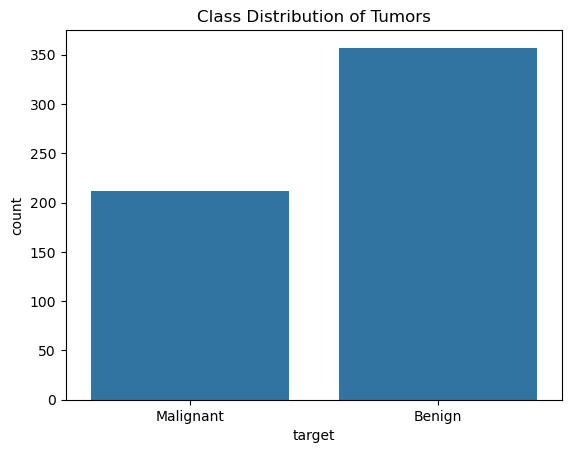

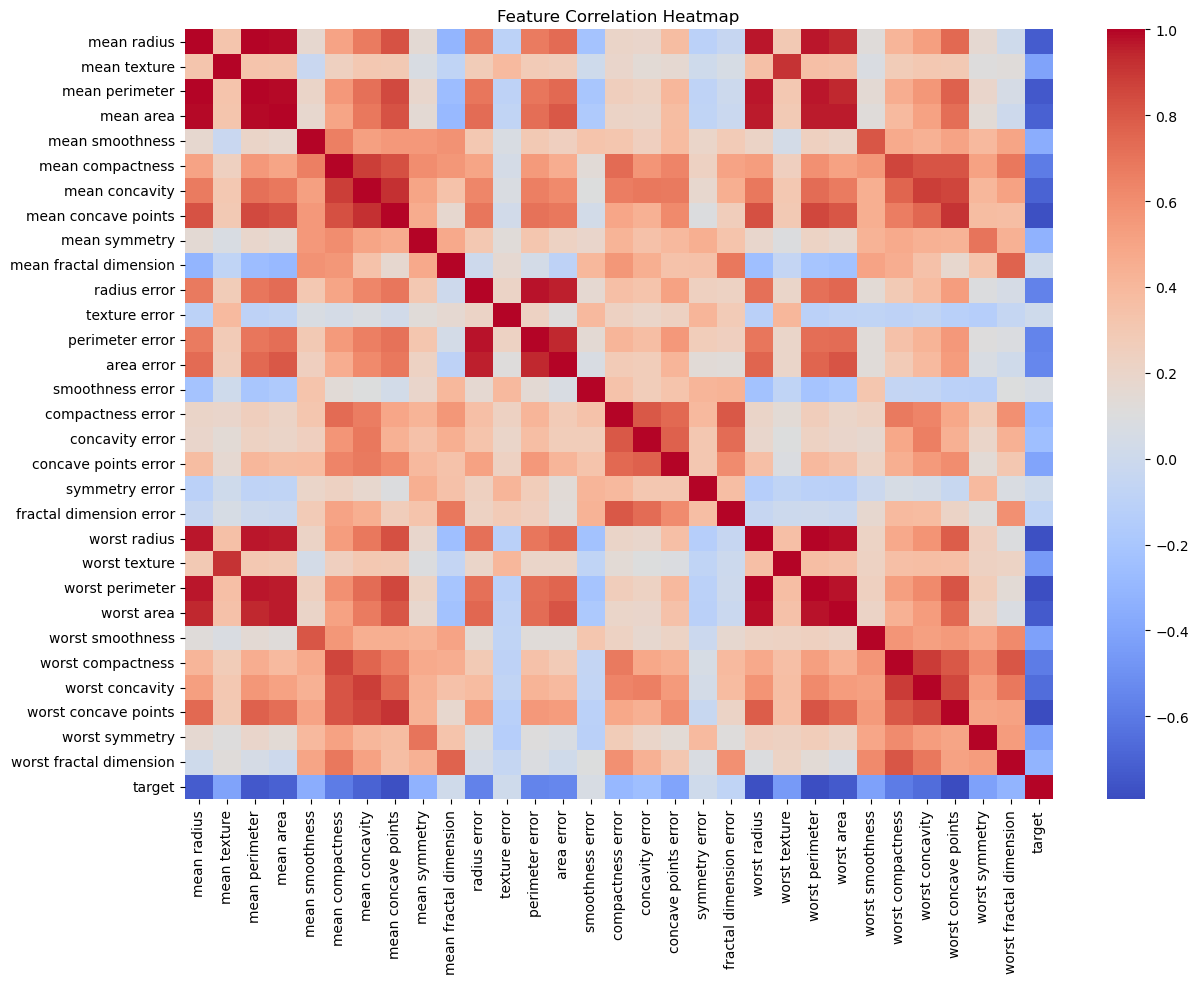

✅ Accuracy Score: 0.9649122807017544

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



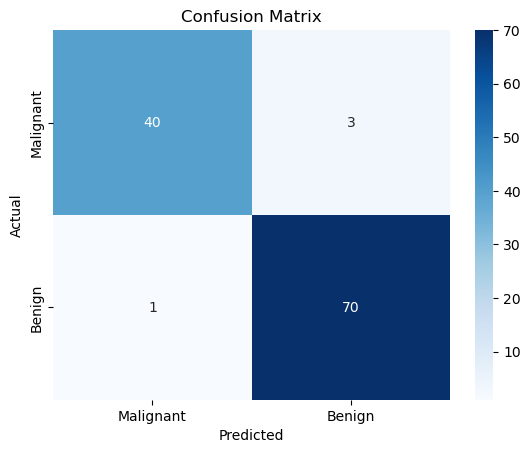


🧠 Prediction for Sample:
Result: Benign


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [3]:
# Basic info
print("Dataset shape:", df.shape)
print("\nTarget labels:", data.target_names)
print("\nTarget value counts:\n", df['target'].value_counts())


Dataset shape: (569, 31)

Target labels: ['malignant' 'benign']

Target value counts:
 target
1    357
0    212
Name: count, dtype: int64


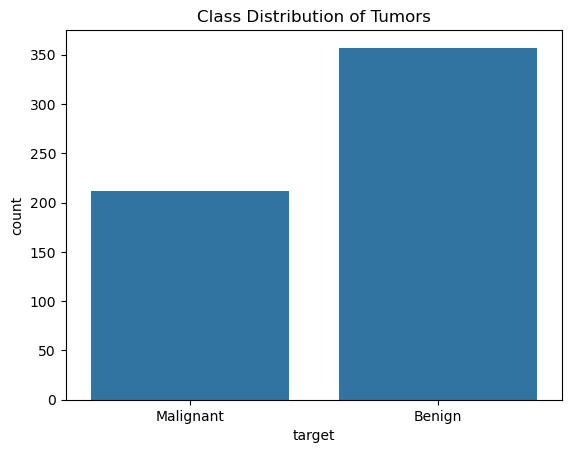

In [4]:
# Visualization
sns.countplot(x='target', data=df)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title('Class Distribution of Tumors')
plt.show()


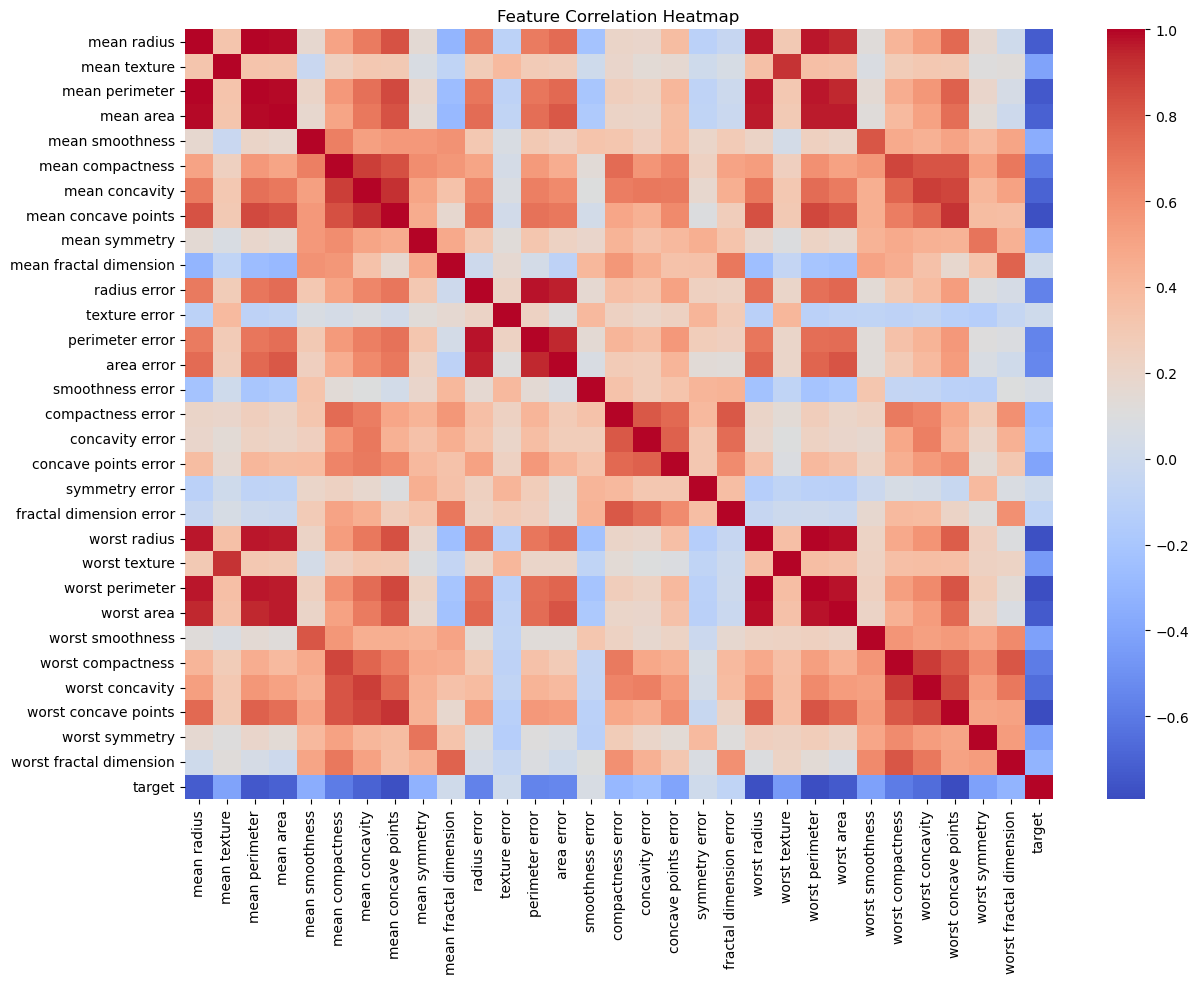

In [5]:

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
# Prepare data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

✅ Accuracy Score: 0.9649122807017544

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



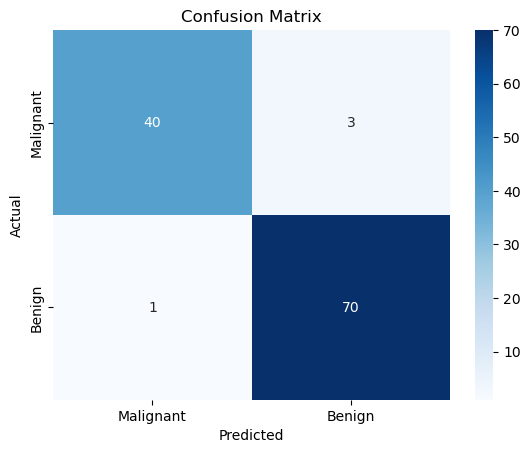

In [8]:
# Evaluation
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Predict on a sample
sample = X_test.iloc[[0]]
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("\n🧠 Prediction for Sample:")
print("Result:", "Malignant" if prediction[0] == 0 else "Benign")



🧠 Prediction for Sample:
Result: Benign
